In [2]:
import numpy as np

trainDataSet = np.genfromtxt('train.csv', delimiter=",")
testDataSet = np.genfromtxt('test.csv', delimiter=",")

In [3]:
print "train data size:", trainDataSet.shape
print "test data size:", testDataSet.shape

train data size: (26999, 785)
test data size: (15001, 785)


In [4]:
trainDataRow, trainDataCol = trainDataSet.shape
testDataRow, testDataCol = testDataSet.shape
print trainDataRow, trainDataCol
print testDataRow, testDataCol

26999 785
15001 785


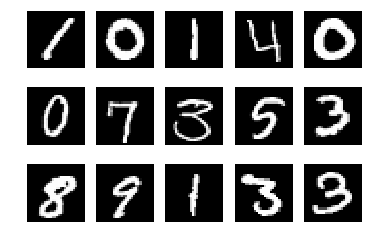

In [39]:
import matplotlib.pyplot as plt

# plot some samples
cnt = 0
for i in range(1,4):
    for j in range(1,6):
        plt.subplot(3,5,cnt+1)
        plt.imshow(trainDataSet[cnt,1:trainDataCol].reshape((28,28)), cmap=plt.cm.Greys_r)
        plt.axis('off')
        cnt = cnt+1
plt.show()

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
TRAIN_DATA_NUM = 1000 #trainDataRow
TEST_DATA_NUM = 10
X_train = trainDataSet[0:TRAIN_DATA_NUM,1:trainDataCol]
y_train = trainDataSet[0:TRAIN_DATA_NUM,0]
X_test = testDataSet[0:TEST_DATA_NUM,1:testDataCol]
y_test = testDataSet[0:TEST_DATA_NUM,0]

In [17]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(1000, 784)
(1000,)
(10, 784)
(10,)


In [73]:
svm = SVC(gamma=0.001, C=100.0, kernel='linear', cache_size=8000, probability=False)
svm.fit(X_train, y_train)
# score = svm.score(X_test, y_test)
# predict output
y_test_predicted = svm.predict(X_test)
'''
print predicted

plt.imshow(X_test[4,:].reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()
accuracy_score(y_test, y_test_predicted)
'''
print classification_report(y_test, y_test_predicted)

             precision    recall  f1-score   support

        2.0       1.00      1.00      1.00         2
        4.0       1.00      1.00      1.00         1
        5.0       1.00      1.00      1.00         2
        6.0       1.00      1.00      1.00         1
        7.0       1.00      1.00      1.00         1
        8.0       1.00      1.00      1.00         1
        9.0       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        10



[ 2.]


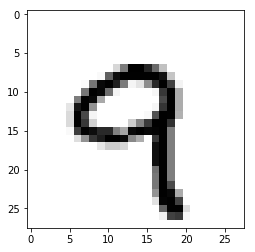

In [78]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
# score = svm.score(X_test, y_test)
# predict output
predicted = svm.predict(X_test[0:1,:])
print predicted

plt.imshow(X_test[0,:].reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [ ]:
#svm.decision_function(X_train)
svm.predict(X_train)

In [97]:
# test test test test test test test test test test test 
import cPickle
import gzip

# Third-party libraries
import numpy as np

f = gzip.open('./mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = cPickle.load(f)
f.close()

In [102]:
print training_data[0].shape
print training_data[1].shape

(50000, 784)
(50000,)


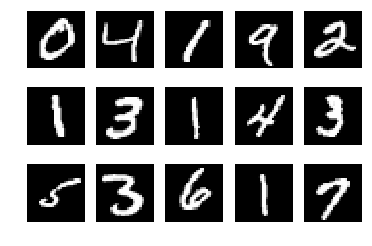

In [104]:
train_data = training_data[0]

cnt = 1
for i in range(1,4):
    for j in range(1,6):
        plt.subplot(3,5,cnt)
        plt.imshow(train_data[cnt,:].reshape((28,28)), cmap=cm.Greys_r)
        plt.axis('off')
        cnt = cnt+1
plt.show()